# **Understanding Environmental and Demographic characteristics in California Communities**

**Problem Statement:**

The California Communities Environmental Health Screening Tool, CalEnviroScreen 3.0 or CES 3.0, specifically identifies communities within California most affected by pollution from multiple sources and most vulnerable to its effects. This project aims to study the association of environmental, health, and socioeconomic indicators with the cumulative CES 3.0 score. Applying a number of statistical and machine learning methods, it tries to highlight significant indicators contributing to the CES 3.0 score and provide predictive models helping with policy simulation.

## Importing necessary libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Set

Data Set link : https://data.ca.gov/dataset/calenviroscreen-3-0-results

In [3]:
# Load the dataset
data = pd.read_csv('calenviroscreen-3.0-results-june-2018-update.csv')
data.columns = data.columns.str.strip()
data.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100.00,95-100% (highest scores),...,77.51,76.3,97.12,17.6,91.72,26.0,79.40,92.12,9.55,99.70
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,99.99,95-100% (highest scores),...,96.25,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,99.97,95-100% (highest scores),...,78.39,86.8,99.56,16.1,87.98,40.1,97.85,94.58,9.81,99.99
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,99.96,95-100% (highest scores),...,75.14,61.3,85.57,19.6,94.97,21.1,63.54,86.70,8.99,97.72
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,99.95,95-100% (highest scores),...,73.72,66.4,90.23,18.6,93.65,28.1,83.98,80.08,8.30,92.76


In [4]:
data.shape

(8035, 57)

There are total 8035 rows and 57 columns.

In [5]:
# Duplicate rows
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Census Tract, Total Population, California County, ZIP, Nearby City 
(to help approximate location only), Longitude, Latitude, CES 3.0 Score, CES 3.0 Percentile, CES 3.0 
Percentile Range, SB 535 Disadvantaged Community, Ozone, Ozone Pctl, PM2.5, PM2.5 Pctl, Diesel PM, Diesel PM Pctl, Drinking Water, Drinking Water Pctl, Pesticides, Pesticides Pctl, Tox. Release, Tox. Release Pctl, Traffic, Traffic Pctl, Cleanup Sites, Cleanup Sites Pctl, Groundwater Threats, Groundwater Threats Pctl, Haz. Waste, Haz. Waste Pctl, Imp. Water Bodies, Imp. Water Bodies Pctl, Solid Waste, Solid Waste Pctl, Pollution Burden, Pollution Burden Score, Pollution Burden Pctl, Asthma, Asthma Pctl, Low Birth Weight, Low Birth Weight Pctl, Cardiovascular Disease, Cardiovascular Disease Pctl, Education, Education Pctl, Linguistic Isolation, Linguistic Isolation Pctl, Poverty, Poverty Pctl, Unemployment, Unemployment Pctl, Housing Burden, Housing Burden Pctl, Pop. Char., Pop. Char. Score, Po

There are no Duplicate rows in data set.

In [6]:
print(data.columns)

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Nearby City \n(to help approximate location only)', 'Longitude',
       'Latitude', 'CES 3.0 Score', 'CES 3.0 Percentile',
       'CES 3.0 \nPercentile Range', 'SB 535 Disadvantaged Community', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', '

We have printed all the columns from the data set.

In [7]:
columns_to_drop = ['CES 3.0 Percentile', 'CES 3.0 \nPercentile Range', 'Ozone Pctl', 'PM2.5 Pctl', 'Diesel PM Pctl', 'Drinking Water Pctl', 'Pesticides Pctl', 'Tox. Release Pctl', 'Traffic Pctl', 'Cleanup Sites Pctl', 'Groundwater Threats Pctl', 'Haz. Waste Pctl', 'Imp. Water Bodies Pctl', 'Solid Waste Pctl', 'Pollution Burden', 'Pollution Burden Pctl', 'Asthma Pctl', 'Low Birth Weight Pctl', 'Cardiovascular Disease Pctl', 'Education Pctl', 'Linguistic Isolation Pctl', 'Poverty Pctl', 'Unemployment Pctl', 'Housing Burden Pctl', 'Pop. Char.', 'Pop. Char. Pctl']

data = data.drop(columns=columns_to_drop)

data.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,SB 535 Disadvantaged Community,Ozone,...,Pollution Burden Score,Asthma,Low Birth Weight,Cardiovascular Disease,Education,Linguistic Isolation,Poverty,Unemployment,Housing Burden,Pop. Char. Score
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,Yes,0.065,...,9.85,131.64,7.44,14.13,53.3,16.2,76.3,17.6,26.0,9.55
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,Yes,0.062,...,10.00,60.66,7.04,12.94,53.3,33.4,72.5,12.3,34.1,9.07
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,Yes,0.062,...,8.76,142.12,10.16,14.96,42.3,16.7,86.8,16.1,40.1,9.81
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,Yes,0.046,...,9.17,142.17,6.23,14.72,40.8,15.3,61.3,19.6,21.1,8.99
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,Yes,0.065,...,9.88,90.48,4.50,12.82,45.1,14.7,66.4,18.6,28.1,8.30


The reason for the dropping these columns:

Many of these columns in the model already show features based on other environmental, health, and socioeconomic indicators, these indicate percentiles or ranges corresponding to those variables.

Multicollinearity problems may occur from including both raw values and percentiles, which can impact model stability and interpretation.

In [8]:
print(data.columns)

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Nearby City \n(to help approximate location only)', 'Longitude',
       'Latitude', 'CES 3.0 Score', 'SB 535 Disadvantaged Community', 'Ozone',
       'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release',
       'Traffic', 'Cleanup Sites', 'Groundwater Threats', 'Haz. Waste',
       'Imp. Water Bodies', 'Solid Waste', 'Pollution Burden Score', 'Asthma',
       'Low Birth Weight', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden',
       'Pop. Char. Score'],
      dtype='object')


Column discrption:
1. **Census Tract:** This column represents the unique identifier for each census tract.
2. **Total Population**: It indicates the total population count residing in each census tract.
3. **California County**: This column specifies the county in California where each census tract is located.
4.  **ZIP**: It represents the ZIP code related with each census tract.
5. **CES 3.0 Score**: This score represents the overall environmental and socioeconomic vulnerability of each census tract.
6. **SB 535 Disadvantaged Community**: This column likely indicates whether each census tract is classified as a disadvantaged community under SB 535.
7. **Ozone**: It represents the level of ozone pollution in each census tract
8. **PM2.5**: It denotes the level of fine particulate matter (PM2.5) pollution in each census tract.
9. **Diesel PM**: It represents the level of diesel particulate matter pollution in each census tract.
10. **Drinking Water**: It denotes the contaminant level in drinking water in each census tract.
11. **Pesticides**: It represents the pesticide exposure level in each census tract.
12. **Tox. Release**: It denotes the level of toxic releases in each census tract.
13. **Traffic**: It represents the traffic-related pollution level in each census tract.
14. **Cleanup Sites**: It denotes the presence of cleanup sites (e.g., hazardous waste cleanup sites) in each census tract.
15. **Groundwater Threats**: It represents the level of groundwater threats in each census tract.
16. **Haz. Waste**: It denotes the presence of hazardous waste sites in each census tract.
17. **Imp. Water Bodies**: It represents the impairment of water bodies in each census tract.
18. **Solid Waste**: It denotes the presence of solid waste sites in each census tract.
19. **Pollution Burden Score**: It represents the overall pollution burden score of each census tract.
20. **Asthma**: It denotes the prevalence of asthma in each census tract.
21. **Low Birth Weight**: It represents the percentage of low birth weight births in each census tract.
22. **Cardiovascular Disease**: It denotes the prevalence of cardiovascular disease in each census tract.
23. **Education**: It represents the level of education attainment in each census tract.
24. **Linguistic Isolation**: It denotes the level of linguistic isolation in each census tract.
25. **Poverty**: It represents the percentage of the population living below the poverty line in each census tract.
26. **Unemployment**: It denotes the unemployment rate in each census tract.
27. **Housing Burden**: It represents the percentage of households with housing cost burdens in each census tract.
28. **Pop. Char. Score**: This column provides the population characteristic score of each census tract.









In [9]:
# Exclude numeric columns from the dataset
categorical_data = data.select_dtypes(exclude=['int64', 'float64'])

In [10]:
categorical_data.isnull().sum()

California County                                    0
Nearby City \n(to help approximate location only)    0
SB 535 Disadvantaged Community                       0
dtype: int64

There are no Missing values in categorical data

In [11]:
# Exclude non-numeric columns from the dataset
numeric_data = data.select_dtypes(include=['int64', 'float64'])

In [12]:
numeric_data.isnull().sum()

Census Tract                0
Total Population            0
ZIP                         0
Longitude                   0
Latitude                    0
CES 3.0 Score             106
Ozone                       0
PM2.5                      19
Diesel PM                   0
Drinking Water             18
Pesticides                  0
Tox. Release                0
Traffic                    56
Cleanup Sites               0
Groundwater Threats         0
Haz. Waste                  0
Imp. Water Bodies           0
Solid Waste                 0
Pollution Burden Score      0
Asthma                      0
Low Birth Weight          222
Cardiovascular Disease      0
Education                  96
Linguistic Isolation      242
Poverty                    79
Unemployment              155
Housing Burden            157
Pop. Char. Score          106
dtype: int64


1. **CES 3.0 Score, PM2.5, Drinking Water, Traffic, Education, Linguistic Isolation, Poverty, Unemployment, Housing Burden, Pop. Char. Score**: These features have a significant number of missing values.

2. **Low Birth Weight**: This feature also has a considerable number of missing values (222).

3. **Total Population, Ozone, Diesel PM, Pesticides, Tox. Release, Cleanup Sites, Groundwater Threats, Haz. Waste, Imp. Water Bodies, Solid Waste, Pollution Burden Score, Asthma, Cardiovascular Disease**: These features have no missing values, indicating that data is available for all observations in these columns.


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define the pipeline
pipeline = Pipeline([
    # Step 1: Impute missing values with mean for numeric columns
    ('imputer_numeric', SimpleImputer(strategy='mean')),
])

# List of numeric columns with missing values
numeric_columns_with_missing = [
    'CES 3.0 Score', 'PM2.5', 'Drinking Water', 'Traffic', 'Low Birth Weight',
    'Education', 'Linguistic Isolation','Poverty', 'Unemployment',
    'Housing Burden','Pop. Char. Score'
]

# Fit the pipeline to the data
pipeline.fit(data[numeric_columns_with_missing])#

# Transform the data
data_transformed = pipeline.transform(data[numeric_columns_with_missing])

# Convert the transformed data back to DataFrame
data_transformed_df = pd.DataFrame(data_transformed, columns=numeric_columns_with_missing)

# Replace the original columns with the transformed columns in the original DataFrame
data[numeric_columns_with_missing]= data_transformed_df

numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Check if there are any missing values left
print(numeric_data.isnull().sum())

Census Tract              0
Total Population          0
ZIP                       0
Longitude                 0
Latitude                  0
CES 3.0 Score             0
Ozone                     0
PM2.5                     0
Diesel PM                 0
Drinking Water            0
Pesticides                0
Tox. Release              0
Traffic                   0
Cleanup Sites             0
Groundwater Threats       0
Haz. Waste                0
Imp. Water Bodies         0
Solid Waste               0
Pollution Burden Score    0
Asthma                    0
Low Birth Weight          0
Cardiovascular Disease    0
Education                 0
Linguistic Isolation      0
Poverty                   0
Unemployment              0
Housing Burden            0
Pop. Char. Score          0
dtype: int64




1.   We used data pre processing pipeline to handle the missing values in the dataset
2.   Used 'mean' method within the pipeline to replace missing values with average value



##EDA

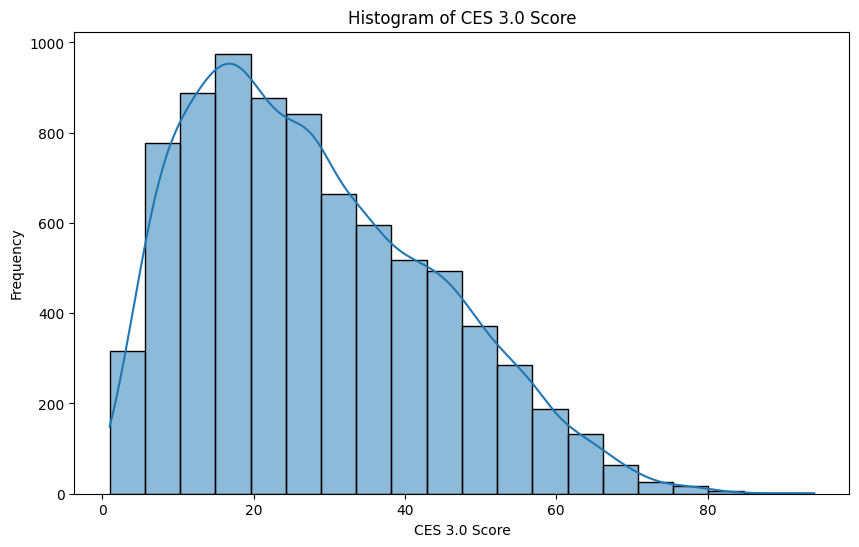

In [14]:
# Histogram of CES 3.0 Score
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='CES 3.0 Score', bins=20, kde=True)
plt.title('Histogram of CES 3.0 Score')
plt.xlabel('CES 3.0 Score')
plt.ylabel('Frequency')
plt.show()

Histogram of CES 3.0 score
1. It is right-skewed distribution.
2. The frequency peaks between 20-40 score range, which indicates that is where most of the data lies.


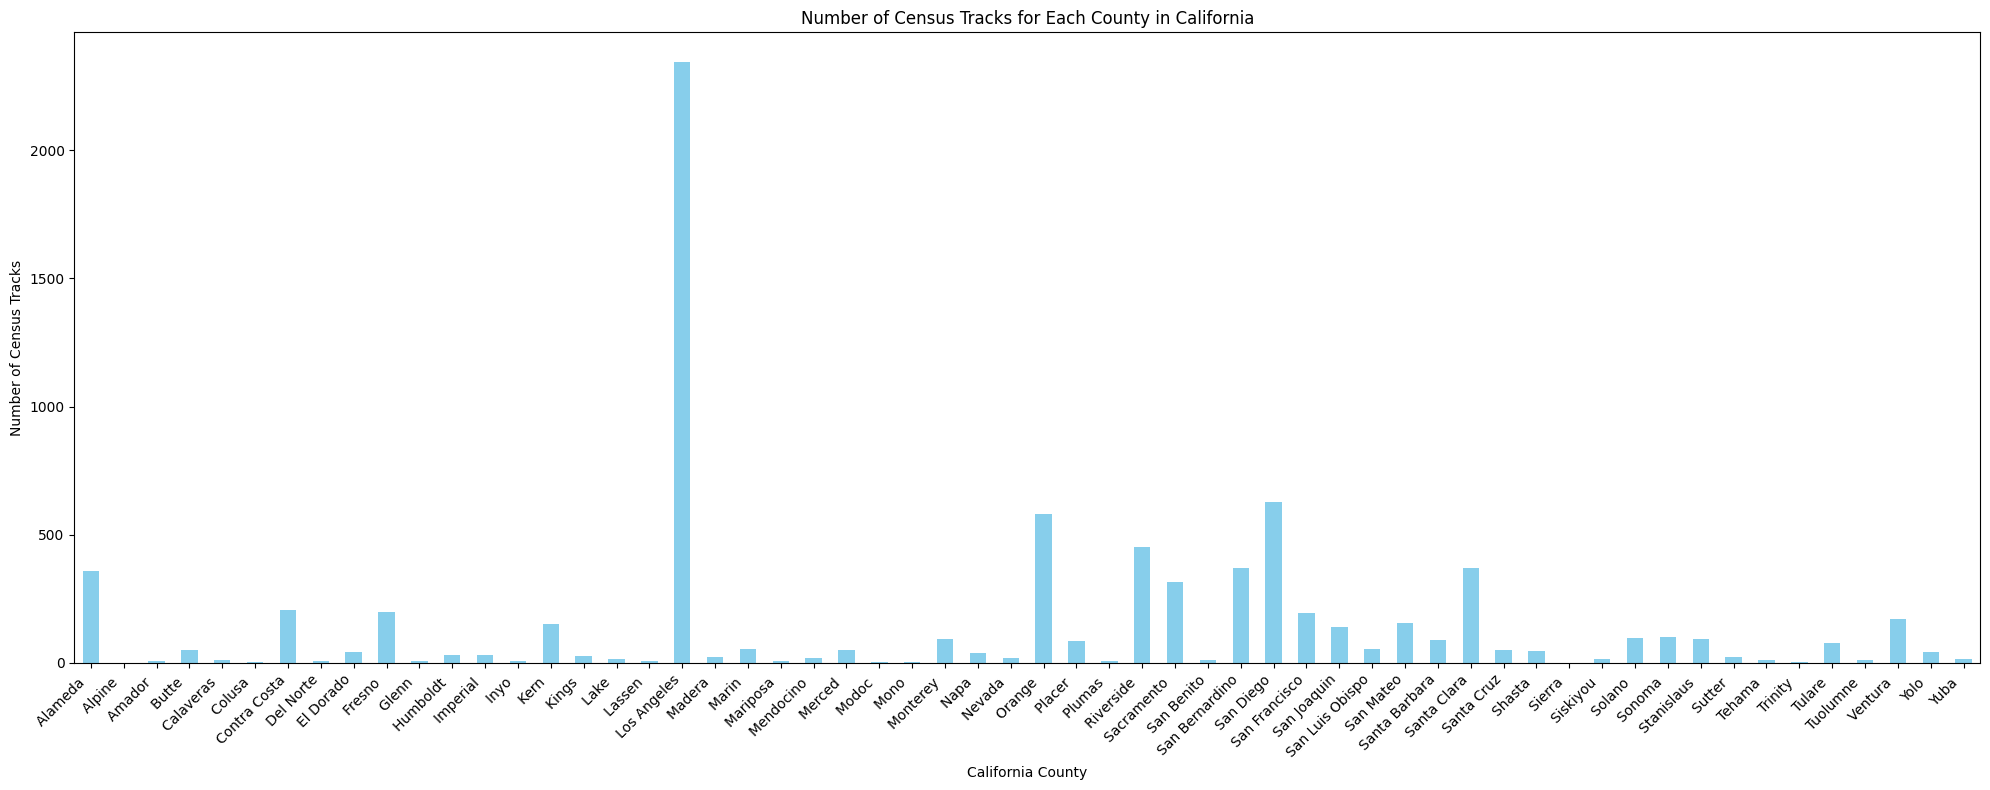

In [15]:
# Group data by county and count the number of census tracts for each county
county_counts = data.groupby('California County')['Census Tract'].nunique()

# Plot the bar graph
plt.figure(figsize=(20, 8))
county_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Census Tracks for Each County in California')
plt.xlabel('California County')
plt.ylabel('Number of Census Tracks')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



From the above graph:
1. Los Angeles county has more high number of census tract, more than 2000. which significantly more than other countries
2. San Diego, Orange, and Santa Clara are the highest.But less compared to the Los Angeles
3. Most counties in california have less than 500 census tracts.

In [16]:
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


                        Census Tract  Total Population       ZIP  Longitude  \
Census Tract                1.000000          0.092702  0.108162  -0.049371   
Total Population            0.092702          1.000000  0.068548   0.044482   
ZIP                         0.108162          0.068548  1.000000  -0.389320   
Longitude                  -0.049371          0.044482 -0.389320   1.000000   
Latitude                    0.042883         -0.036000  0.428458  -0.926705   
CES 3.0 Score              -0.187310          0.043251 -0.149865   0.239795   
Ozone                      -0.041672          0.081119 -0.122336   0.581215   
PM2.5                      -0.156067          0.049385 -0.187019   0.384503   
Diesel PM                  -0.169529         -0.092283 -0.076206  -0.029428   
Drinking Water              0.075888          0.068659 -0.095171   0.291556   
Pesticides                  0.105101          0.025154  0.028884  -0.038766   
Tox. Release               -0.058856          0.0261

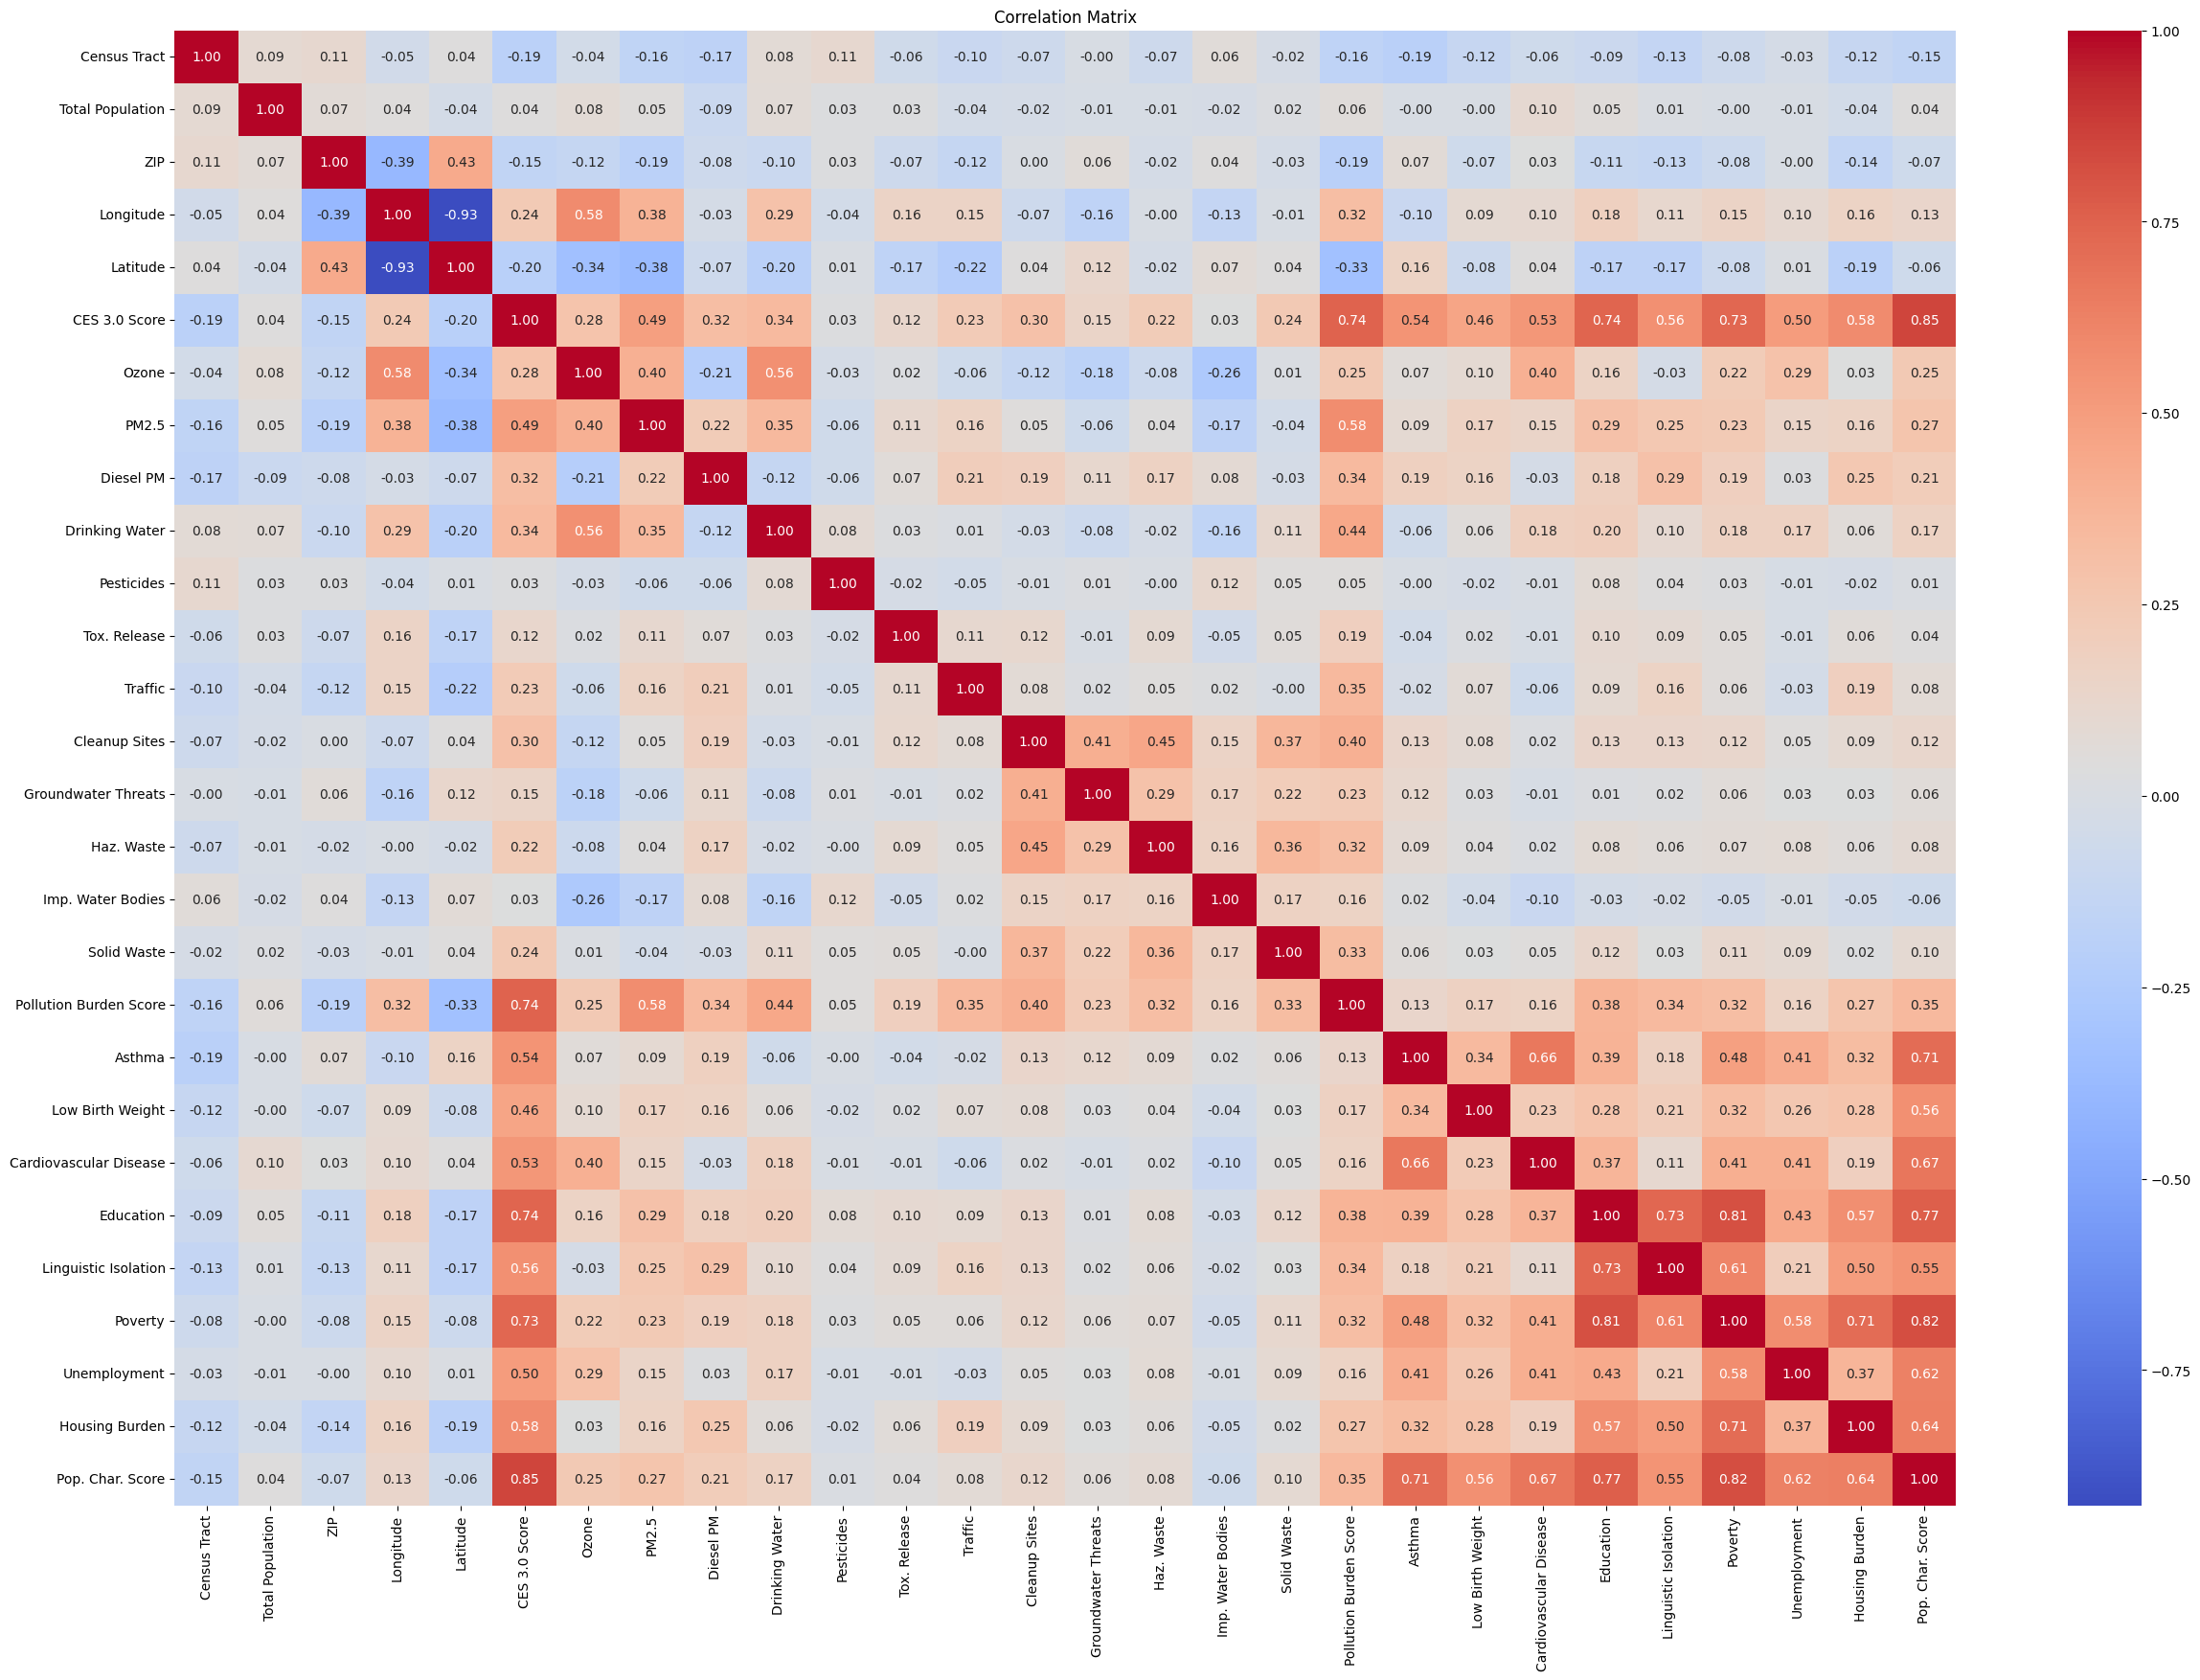

In [17]:
# Heatmap for visualization of correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From the correlation map:

We considered the top 9 features [ which have highly correlation(>0.50) ] with the CES 3.0 score(target variable).



In [18]:
# Select the top 9 features highly correlated with CES 3.0
top_9_features = correlation_matrix['CES 3.0 Score'].sort_values(ascending=False)[1:10]

# Print the top 9 features
print(top_9_features)

print(list(top_9_features.index))

Pop. Char. Score          0.852999
Pollution Burden Score    0.744379
Education                 0.742317
Poverty                   0.729445
Housing Burden            0.580420
Linguistic Isolation      0.560434
Asthma                    0.541967
Cardiovascular Disease    0.528558
Unemployment              0.504181
Name: CES 3.0 Score, dtype: float64
['Pop. Char. Score', 'Pollution Burden Score', 'Education', 'Poverty', 'Housing Burden', 'Linguistic Isolation', 'Asthma', 'Cardiovascular Disease', 'Unemployment']


How each feature is related to CES 3.0 score and for our problem statement:

**Pop. Char. score:**
A higher Pop. Char. Score means a greater vulnerability of the population, hence is a large contributor to the CES 3.0 score. Communities with higher vulnerability are more likely to suffer from the adverse effects of pollution, therefore requiring policy measures to be implemented at them.

**Pollution burden score:**
Communities with higher pollution burden are directly linked to the higher CES 3.0 score, since pollution exposure negatively impacts public health, which also aggravates current socioeconomic issues.

**Education:**
Low education levels often correspond to lower health awareness and reduced access to resources, which can mean higher susceptibility to pollution-related health issues and, therefore, a higher CES 3.0 score.

**Poverty:** For the low-income communities who lack resources for healthcare, experience reduced access to healthy living conditions, and are more exposed to pollution because of historical disinvestment and poor zoning policies, this leads to a higher CES 3.0 score.

**Housing burden:**  Overburdened households, struggling to meet their basic needs, are more vulnerable to the health and socioeconomic effects of pollution, thereby increasing CES 3.0 scores.

**Lingustic Isolation:** Many of these communities not only lack access to proper health care but also to the assistance from governments, making them more susceptible to health issues from pollution and increasing their CES 3.0 score.

**Asthma:** The higher utilization rates in emergency rooms for asthma in a community are often indicative of exposure to air pollution, adding toward a higher CES 3.0 score.


**Cardiovascular disease:** High rates of emergency visits for heart attacks in the community suggest that pollution-related cardiovascular issues are common in the community and tremendously increase the CES 3.0 score.

**Unemployment :** Unemployment rates are indicators of economic instability, which reduces access to healthcare and healthy living conditions. Higher unemployment rates mean that communities have less resilience in responding to the impacts of pollution and thus will have higher CES 3.0 scores

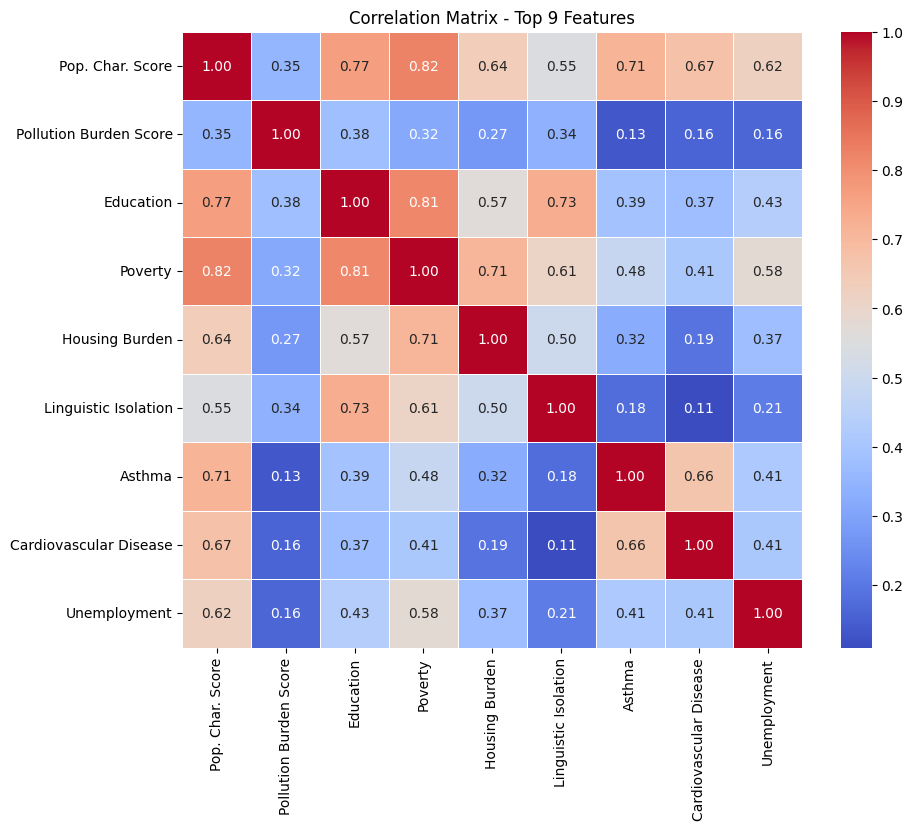

In [19]:
top_9_features = ['Pop. Char. Score', 'Pollution Burden Score', 'Education', 'Poverty', 'Housing Burden', 'Linguistic Isolation', 'Asthma', 'Cardiovascular Disease', 'Unemployment']

correlation_matrix = data[top_9_features].corr()


# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix - Top 9 Features')
plt.show()

In [20]:
final_features=[]

# Select the top 9 features
top_9_features = ['Pop. Char. Score', 'Pollution Burden Score', 'Education', 'Poverty', 'Housing Burden', 'Linguistic Isolation', 'Asthma', 'Cardiovascular Disease', 'Unemployment']


# Create a subset of the correlation matrix with only the top 10 features
top_9_corr_matrix = correlation_matrix[top_9_features]

# Find highly correlated features
highly_correlated_features = set()
for feature_i in top_9_features:
    for feature_j in top_9_features:
        if feature_i != feature_j:
            correlation = top_9_corr_matrix.loc[feature_i, feature_j]
            if abs(correlation) > 0.7:  # Adjust the threshold as needed
                top_9_features.remove(feature_j)

# Drop one feature from highly correlated features
if len(highly_correlated_features) > 0:
    feature_to_drop = highly_correlated_features.pop()
    top_9_features.remove(feature_to_drop)

# Print the remaining top features after dropping highly correlated feature and add them to final_features list
print("Final features after dropping highly correlated feature:")
for feature in top_9_features:
    final_features.append(feature)

for i in range(len(final_features)):
    print(final_features[i])


Final features after dropping highly correlated feature:
Pollution Burden Score
Poverty
Linguistic Isolation
Cardiovascular Disease
Unemployment


Correlation map:

* To check if there is any multi collinearity between the potential features.

From the code:
* we dropped some of the features which are highly correlated

Final Features are
1. Pollution Burden Score
2. Poverty
3. Linguistic Isolation
4. Cardiovascular Disease
5. Unemployment  

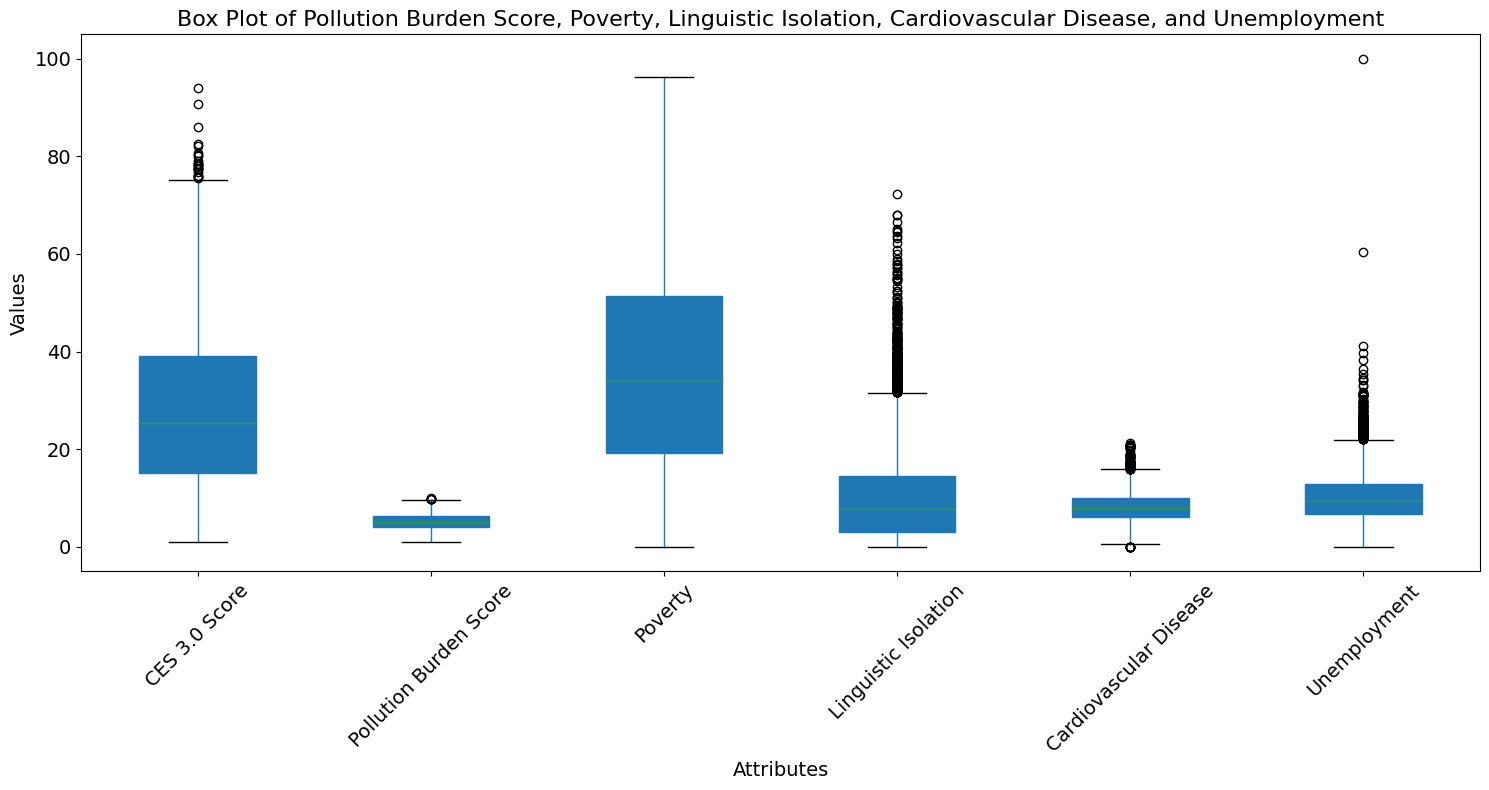

In [21]:
# Selecting columns for box plot
columns = ['CES 3.0 Score', 'Pollution Burden Score', 'Poverty', 'Linguistic Isolation', 'Cardiovascular Disease', 'Unemployment']

# Creating a larger figure
plt.figure(figsize=(15, 8))  # Larger figure size for better visualization

# Creating a box plot with a different style
boxplot = data[columns].boxplot(fontsize=14, grid=False, patch_artist=True)

# Adding styles to the box plots
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF69B4']
for box, color in zip(boxplot.artists, colors):  # Accessing each box (artist) directly
    box.set_facecolor(color)

# Adding title and labels with larger fonts
plt.title('Box Plot of Pollution Burden Score, Poverty, Linguistic Isolation, Cardiovascular Disease, and Unemployment', fontsize=16)
plt.xlabel('Attributes', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Displaying the plot
plt.show()


**CES 3.0 Score:** Several high outliers present above the maximum whisker limit

**Pollution Burden Score:** Few outliers detected above the maximum whisker.

**Poverty:** No outliers.

**Linguistic Isolation:** A significant number of outliers above the maximum whisker limit.

**Cardiovascular Disease:** Some outliers are present, but the distribution is consistent.

**Unemployment:** High number of outliers above the maximum whisker.



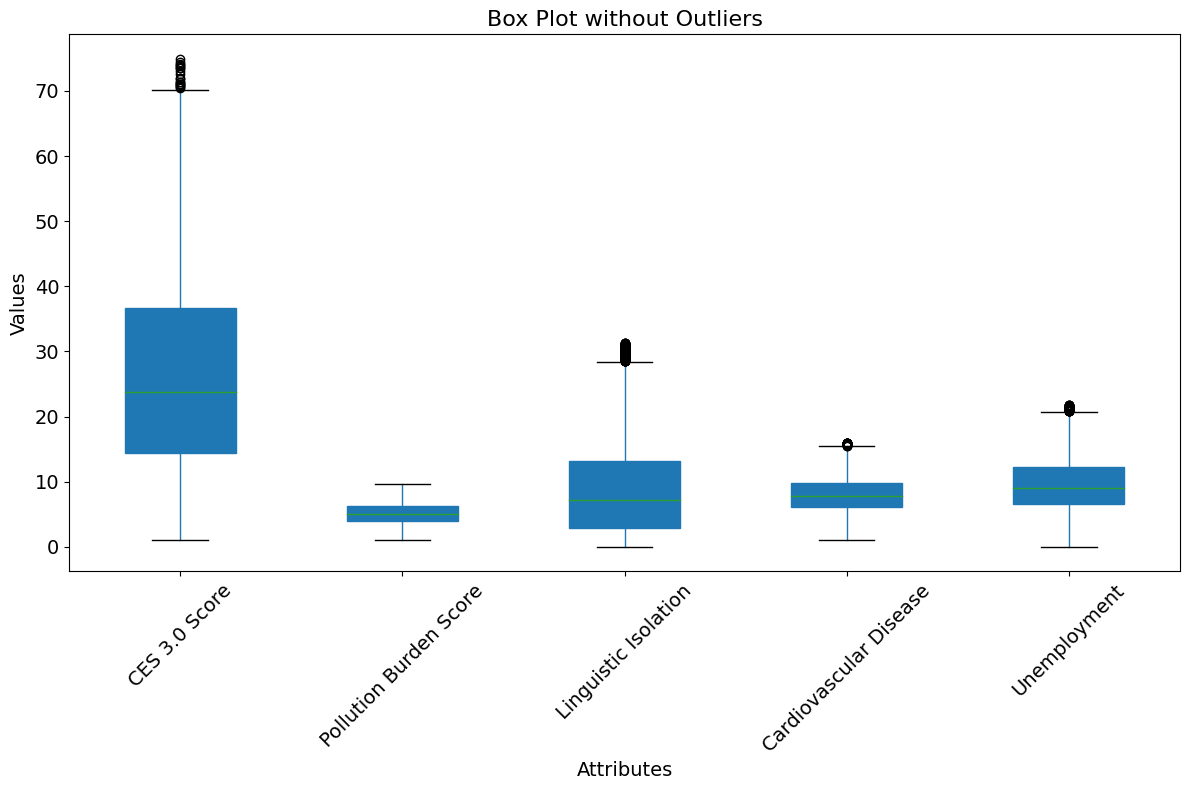

In [22]:
# List of columns containing outliers
columns = ['CES 3.0 Score', 'Pollution Burden Score', 'Linguistic Isolation', 'Cardiovascular Disease', 'Unemployment']

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each specified column
cleaned_data = data.copy()
for col in columns:
    cleaned_data = remove_outliers(cleaned_data, col)

# Creating a larger figure for better visualization
plt.figure(figsize=(12, 8))

# Drawing the box plot without outliers
boxplot = cleaned_data[columns].boxplot(fontsize=14, grid=False, patch_artist=True)

# Adding styles to each box individually
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF69B4']
for box, color in zip(boxplot.artists, colors):
    box.set_facecolor(color)

# Adding title and labels with larger fonts
plt.title('Box Plot without Outliers', fontsize=16)
plt.xlabel('Attributes', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [23]:
data = cleaned_data.copy()

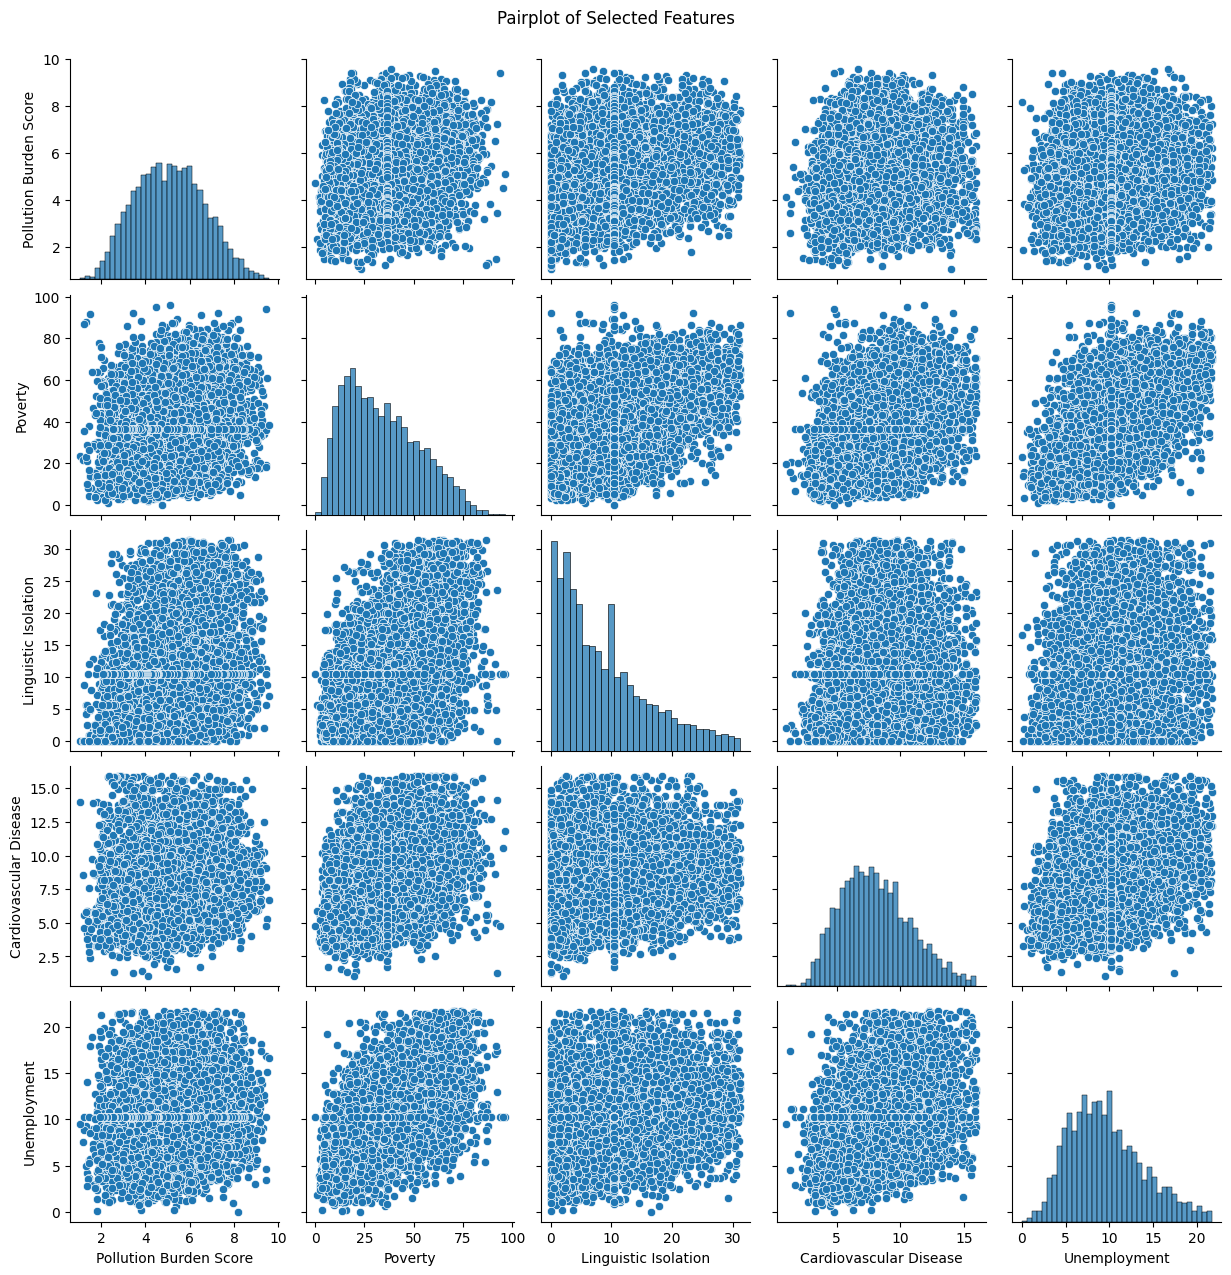

In [24]:
# Pairplot of selected features

sns.pairplot(data=data[final_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

## Features and Traget

In [25]:
# Defining the features and the target of the model

X = data[final_features] # Features
y = data['CES 3.0 Score'] # Target

In [26]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

* Features = [Pollution Burden Score, Poverty, Linguistic Isolation, Cardiovascular Disease, Unemployment]

* Target = [CES 3.0 Score]

* Train Size = 70%

* Test Size = 30%

## LinearRegression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize Linear Regression model
linear_reg = LinearRegression()

# Fit the model on training data
linear_reg.fit(X_train, y_train)


print('Intercept:', linear_reg.intercept_)

Intercept: -27.155710593524134


In [29]:
# Predict on training and test data
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

# Calculate R-squared for train dataset
r2_train_score = linear_reg.score(X_train, y_train)

# Calculate R-squared for test dataset
r2_test_score = linear_reg.score(X_test, y_test)

# Calculate Mean Absolute Error (MAE) for train dataset
mae_train = mean_absolute_error(y_train, y_pred_train)

# Calculate Mean Absolute Error (MAE) for test dataset
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate Mean Squared Error (MSE) for train dataset
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate Mean Squared Error (MSE) for test dataset
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the results
print("Linear Regression Results:")
print('\nR^2 score for train dataset = ', round(r2_train_score, 4))
print('R^2 score for test dataset = ', round(r2_test_score, 4))
print('\nMean Absolute Error (MAE) for train dataset = ', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset = ', round(mae_test, 4))
print('\nMean Squared Error (MSE) for train dataset = ', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset = ', round(mse_test, 4))

Linear Regression Results:

R^2 score for train dataset =  0.8999
R^2 score for test dataset =  0.9037

Mean Absolute Error (MAE) for train dataset =  3.78
Mean Absolute Error (MAE) for test dataset =  3.7027

Mean Squared Error (MSE) for train dataset =  23.8472
Mean Squared Error (MSE) for test dataset =  22.5016


1. With R^2 0.899 on training and 0.9037 on the test data indicates a better fit to the model
2. Value of MAE is decreased from 3.78 on train data to 3.7027 on test data indicating consistent and accurate predictions
3. Minimal difference between MSE suggests that, this model predictions are reliably close to actual values

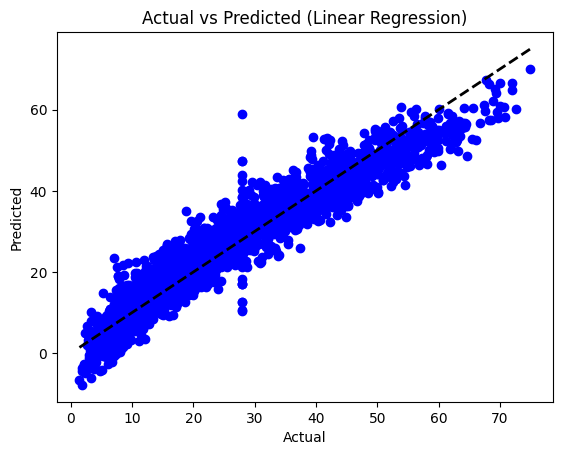

In [30]:
# Plotting the actual vs predicted values for the test dataset
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Linear Regression)')
plt.show()


* Most of the points lie close to the diagnol line, wwich indicates that model is providing predictions that closely match actual data.

## Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Define the degree of the polynomial
degree = 2  # You can adjust this parameter based on your requirements

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Initialize and fit the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)


LinearRegression()

In [32]:

# Predictions on training and test set
y_pred_train = poly_reg.predict(X_poly_train)
y_pred_test = poly_reg.predict(X_poly_test)

# Calculate R-squared for train and test dataset
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Calculate Mean Absolute Error (MAE) for train and test dataset
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate Mean Squared Error (MSE) for train and test dataset
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Polynomial Regression (Degree = {}):".format(degree))
print("\nR^2 score for train dataset = {:.4f}".format(r2_train))
print("R^2 score for test dataset = {:.4f}".format(r2_test))
print("\nMean Absolute Error (MAE) for train dataset = {:.4f}".format(mae_train))
print("Mean Absolute Error (MAE) for test dataset = {:.4f}".format(mae_test))
print("\nMean Squared Error (MSE) for train dataset = {:.4f}".format(mse_train))
print("Mean Squared Error (MSE) for test dataset = {:.4f}".format(mse_test))


Polynomial Regression (Degree = 2):

R^2 score for train dataset = 0.9365
R^2 score for test dataset = 0.9368

Mean Absolute Error (MAE) for train dataset = 2.9343
Mean Absolute Error (MAE) for test dataset = 2.9134

Mean Squared Error (MSE) for train dataset = 15.1387
Mean Squared Error (MSE) for test dataset = 14.7642


1. Achieves High R^2 scored and lower MAE and MSE values compared to the linear regression model.
2. R^2 indicate better model fit to data variablity
3. MAE and MSE show consistent and accurate predictions

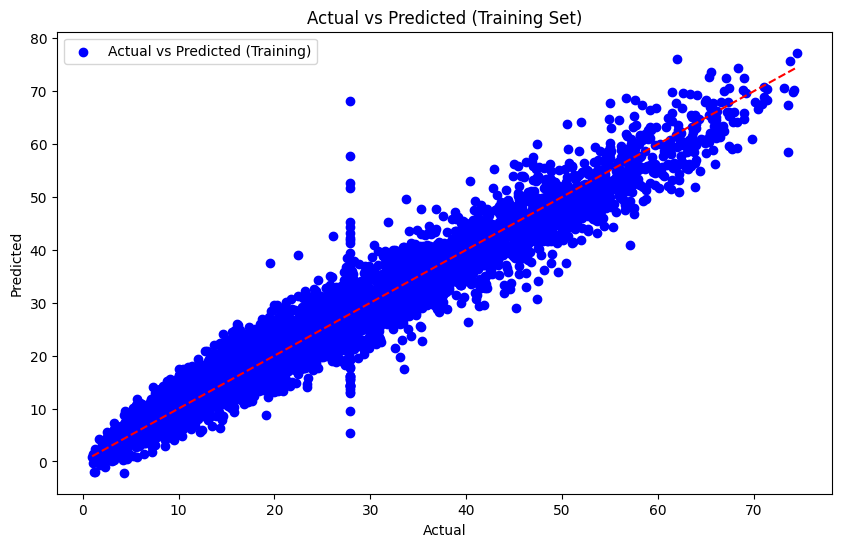

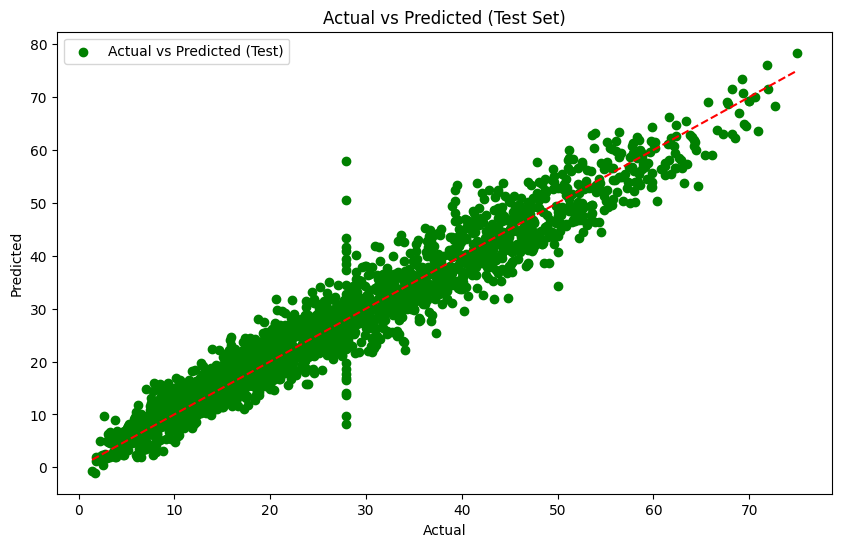

In [33]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Training Set)')
plt.legend()
plt.show()

# Plotting the actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Actual vs Predicted (Test)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Test Set)')
plt.legend()
plt.show()


**From the graphs**
1. High consistency between both training and testing
2. Strong prediction accuracy with minimal overfitting
3. Some areas need further tuning
4. Overall, the model generalizes to the unseen data

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define the degree of polynomial
degree = 3

# Create polynomial features
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit linear regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)


LinearRegression()

In [35]:

# Predictions on training and test set
y_pred_train = poly_reg.predict(X_poly_train)
y_pred_test = poly_reg.predict(X_poly_test)

# Calculate R-squared for train and test dataset
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Calculate Mean Absolute Error (MAE) for train and test dataset
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate Mean Squared Error (MSE) for train and test dataset
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Polynomial Regression (Degree = {}):".format(degree))
print("R^2 score for train dataset = {:.4f}".format(r2_train))
print("R^2 score for test dataset = {:.4f}".format(r2_test))
print("Mean Absolute Error (MAE) for train dataset = {:.4f}".format(mae_train))
print("Mean Absolute Error (MAE) for test dataset = {:.4f}".format(mae_test))
print("Mean Squared Error (MSE) for train dataset = {:.4f}".format(mse_train))
print("Mean Squared Error (MSE) for test dataset = {:.4f}".format(mse_test))


Polynomial Regression (Degree = 3):
R^2 score for train dataset = 0.9401
R^2 score for test dataset = 0.9391
Mean Absolute Error (MAE) for train dataset = 2.8516
Mean Absolute Error (MAE) for test dataset = 2.8709
Mean Squared Error (MSE) for train dataset = 14.2639
Mean Squared Error (MSE) for test dataset = 14.2271


1. Slight Perfomance improvement is observed when compared to Degree 2
2. Indicating better fit to the model
3. The close R-squared, MAE, and MSE values between the training and testing sets indicate minimal overfitting, demonstrating that the models generalize well to unseen data.

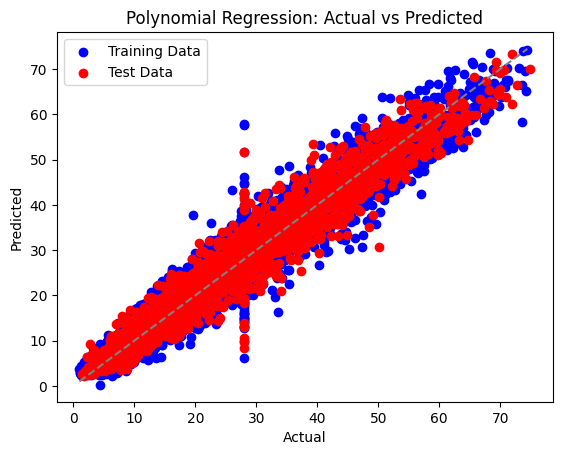

In [36]:
import matplotlib.pyplot as plt

# Plotting the training data
plt.scatter(y_train, y_pred_train, color='blue', label='Training Data')

# Plotting the test data
plt.scatter(y_test, y_pred_test, color='red', label='Test Data')

# Plotting the diagonal line
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='gray', linestyle='--')

plt.title('Polynomial Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


1. Strong predictive performance is displayed by the model, which generalizes well throughout the training and test sets.
2. Although some variability in the predicts shows minor deviations, residual patterns seem balanced.
3. The model exhibits robust predictive power with minimal overfitting between training and test datasets, providing accurate predictions that closely align with actual values.

## DecisionTreeRegressor


In [37]:
from sklearn.tree import DecisionTreeRegressor

# Constructing a tree regressor without hyperparameters tuning
tr_reg = DecisionTreeRegressor(random_state=3)

# Fitting the tree regressor to the training data
tr_reg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=3)

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predicting on the training set
y_train_pred = tr_reg.predict(X_train)

# Predicting on the test set
y_test_pred = tr_reg.predict(X_test)

# Calculating R^2 score for train and test datasets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating Mean Absolute Error (MAE) for train and test datasets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculating Mean Squared Error (MSE) for train and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Printing the metrics
print('Decision Tree Regressor:')
print('R^2 score for train dataset =', round(r2_train, 4))
print('R^2 score for test dataset =', round(r2_test, 4))
print('\nMean Absolute Error (MAE) for train dataset =', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset =', round(mae_test, 4))
print('\nMean Squared Error (MSE) for train dataset =', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset =', round(mse_test, 4))


Decision Tree Regressor:
R^2 score for train dataset = 1.0
R^2 score for test dataset = 0.8529

Mean Absolute Error (MAE) for train dataset = 0.0
Mean Absolute Error (MAE) for test dataset = 4.3496

Mean Squared Error (MSE) for train dataset = 0.0
Mean Squared Error (MSE) for test dataset = 34.3545


1. The model fits perfectly for the train data, as R^2, MAE and MSE values are 1.0,0.0,0.0 respectively.This indicates potential overfitting the model didn't perform well in the test data.

2. The difference between training and testing score suggests that model might be taiored to the training data and not fully generealised

3. Hyper parameter tuning is neccesary to improve the model perfomance .


In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=3), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


Best Parameters are
* max_depth = None
* min_samples_leaf= 4
* min_samples_split = 10

In [40]:
from sklearn.tree import DecisionTreeRegressor

# The best parameters
best_params = {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


# Create a DecisionTreeRegressor with the best parameters
best_tree_reg = DecisionTreeRegressor(**best_params)

# Fit the model to the training data
best_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10)

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the training data
y_pred_train = best_tree_reg.predict(X_train)

# Predict on the test data
y_pred_test = best_tree_reg.predict(X_test)

# Calculate R-squared for train dataset
r2_train_score = best_tree_reg.score(X_train, y_train)
# Calculate R-squared for test dataset
r2_test_score = best_tree_reg.score(X_test, y_test)


# Calculate Mean Absolute Error (MAE) for train dataset
mae_train = mean_absolute_error(y_train, y_pred_train)
# Calculate Mean Absolute Error (MAE) for test dataset
mae_test = mean_absolute_error(y_test, y_pred_test)


# Calculate Mean Squared Error (MSE) for train dataset
mse_train = mean_squared_error(y_train, y_pred_train)
# Calculate Mean Squared Error (MSE) for test dataset
mse_test = mean_squared_error(y_test, y_pred_test)

print('Decision Tree Regressor (After Hyper Parameter Tuning):')

print('\nR^2 score for train dataset = ', round(r2_train_score, 4))
print('R^2 score for test dataset = ', round(r2_test_score, 4))

print('\nMean Absolute Error (MAE) for train dataset = ', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset = ', round(mae_test, 4))

print('\nMean Squared Error (MSE) for train dataset = ', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset = ', round(mse_test, 4))



Decision Tree Regressor (After Hyper Parameter Tuning):

R^2 score for train dataset =  0.9701
R^2 score for test dataset =  0.8824

Mean Absolute Error (MAE) for train dataset =  1.9667
Mean Absolute Error (MAE) for test dataset =  3.9635

Mean Squared Error (MSE) for train dataset =  7.1243
Mean Squared Error (MSE) for test dataset =  27.4784


 The perfomance is improved after the tuning, but difference between the training and testing results suggests that model may suffering from high variance.Even though the training set metrics are good, the test metrics show a heavy drop. This drop indicates that the model may be overfitting the training data, that leading to higher error rates when predicting on unseen data.

Now, to reduce the high variance, we apply the bagging method to decision tree regressors

## Bagging Regression

In [42]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Assuming you have already defined X and y as features and target

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Constructing a decision tree regressor (base estimator)
base_estimator = DecisionTreeRegressor()

# Constructing the bagging regressor
bag_reg = BaggingRegressor(base_estimator=base_estimator, random_state=3)

# Fitting the bagging regressor to the training data
bag_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=3)

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the training data
y_pred_train = bag_reg.predict(X_train)
# Predict on the test data
y_pred_test = bag_reg.predict(X_test)

# Calculate R-squared for train dataset
r2_train_score = bag_reg.score(X_train, y_train)
# Calculate R-squared for test dataset
r2_test_score = bag_reg.score(X_test, y_test)

# Calculate Mean Absolute Error (MAE) for train dataset
mae_train = mean_absolute_error(y_train, y_pred_train)
# Calculate Mean Absolute Error (MAE) for test dataset
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate Mean Squared Error (MSE) for train dataset
mse_train = mean_squared_error(y_train, y_pred_train)
# Calculate Mean Squared Error (MSE) for test dataset
mse_test = mean_squared_error(y_test, y_pred_test)

print('BaggingRegressor :')

print('\nR^2 score for train dataset = ', round(r2_train_score, 4))
print('R^2 score for test dataset = ', round(r2_test_score, 4))

print('\nMean Absolute Error (MAE) for train dataset = ', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset = ', round(mae_test, 4))

print('\nMean Squared Error (MSE) for train dataset = ', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset = ', round(mse_test, 4))


BaggingRegressor :

R^2 score for train dataset =  0.9858
R^2 score for test dataset =  0.9267

Mean Absolute Error (MAE) for train dataset =  1.2853
Mean Absolute Error (MAE) for test dataset =  3.135

Mean Squared Error (MSE) for train dataset =  3.3744
Mean Squared Error (MSE) for test dataset =  17.1274


The bagging regressor shows good perfomance in terms of R^2 and relatively low errors for both training and testing datasets. the model is having Overfitting as model's perfomance slightly decreases on the test dataset compared to training dataset. Further hyper parameter tuning may improve model's perfomance.

In [44]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

# Define the base estimator
base_estimator = DecisionTreeRegressor()

# Define the parameters grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False]
}

# Initialize the BaggingRegressor
bagging_reg = BaggingRegressor(base_estimator=base_estimator, random_state=3)

# Initialize GridSearchCV
grid_search = GridSearchCV(bagging_reg, param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        random_state=3),
             param_grid={'bootstrap': [True, False], 'max_features': [0.5, 1.0],
                         'max_samples': [0.5, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='r2')

In [45]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Bagging Regressor:", best_params)

Best Hyperparameters for Bagging Regressor: {'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}


Best Hyperparameters for Bagging Regressor:
* bootstrap = True
* max_features = 1.0
* max_samples' = 0.5
* n_estimators = 100


In [46]:
from sklearn.ensemble import BaggingRegressor

# Initialize BaggingRegressor with best hyperparameters
best_bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                     n_estimators=100,
                                     max_samples=0.5,
                                     max_features=1.0,
                                     bootstrap=True,
                                     random_state=3)

# Fit the model to the training data
best_bagging_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.5,
                 n_estimators=100, random_state=3)

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the training data
y_pred_train = best_bagging_reg.predict(X_train)
# Predict on the test data
y_pred_test = best_bagging_reg.predict(X_test)

# Calculate R-squared for train dataset
r2_train_score = best_bagging_reg.score(X_train, y_train)
# Calculate R-squared for test dataset
r2_test_score = best_bagging_reg.score(X_test, y_test)

# Calculate Mean Absolute Error (MAE) for train dataset
mae_train = mean_absolute_error(y_train, y_pred_train)
# Calculate Mean Absolute Error (MAE) for test dataset
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate Mean Squared Error (MSE) for train dataset
mse_train = mean_squared_error(y_train, y_pred_train)
# Calculate Mean Squared Error (MSE) for test dataset
mse_test = mean_squared_error(y_test, y_pred_test)

print('Bagging Regressor (After Hyper Parameter Tuning)\n')

print('R^2 score for train dataset = ', round(r2_train_score, 4))
print('R^2 score for test dataset = ', round(r2_test_score, 4))

print('\nMean Absolute Error (MAE) for train dataset = ', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset = ', round(mae_test, 4))

print('\nMean Squared Error (MSE) for train dataset = ', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset = ', round(mse_test, 4))


Bagging Regressor (After Hyper Parameter Tuning)

R^2 score for train dataset =  0.9747
R^2 score for test dataset =  0.9339

Mean Absolute Error (MAE) for train dataset =  1.8677
Mean Absolute Error (MAE) for test dataset =  2.9956

Mean Squared Error (MSE) for train dataset =  6.0351
Mean Squared Error (MSE) for test dataset =  15.4516


* Difference between the training and testing metrics indicate that the model may not be generalizing well to unseen data.

* High r^2 values indicate good perfomance in explaining the variance in the data, the model's predictive accuracy on new data is not as strong.

* We now try a random forest regressor on the dataset and compare the results with the bagging method.


## Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=3)

# Fit the model to the training data
rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=3)

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predicting on the training set
y_train_pred = rf_reg.predict(X_train)

# Predicting on the test set
y_test_pred = rf_reg.predict(X_test)

# Calculating R^2 score for train and test datasets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating Mean Absolute Error (MAE) for train and test datasets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculating Mean Squared Error (MSE) for train and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Printing the metrics
print('Random Forest Regressor :\n')
print('R^2 score for train dataset =', round(r2_train, 4))
print('R^2 score for test dataset =', round(r2_test, 4))
print('\nMean Absolute Error (MAE) for train dataset =', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset =', round(mae_test, 4))
print('\nMean Squared Error (MSE) for train dataset =', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset =', round(mse_test, 4))


Random Forest Regressor :

R^2 score for train dataset = 0.9904
R^2 score for test dataset = 0.9327

Mean Absolute Error (MAE) for train dataset = 1.1449
Mean Absolute Error (MAE) for test dataset = 2.9952

Mean Squared Error (MSE) for train dataset = 2.2991
Mean Squared Error (MSE) for test dataset = 15.7189


* The Random Forest Regressor's effectiveness is demonstrated by its high accuracy on both the training dataset and test dataset with R^2 scores of 0.9904 and 0.9327 respectively, which implies that the model explains 99.04% and 93.27% of variance in target variable for training and test data sets, correspondingly.



* The MAE is higher for the testing data set (2.9952) than it is for the training data set (1.1449). Low MAE values suggest higher prediction accuracy.



* The model records a MSE of 2.2991 on training set while it gets as high as 15.7189 on test set. Smaller MSE indicates less prediction errors meaning that compared with the test data, this model performs better in explaining results for training dataset.

In [50]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=3)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=3),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [51]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Best Hyperparameters for Random Forest Regressor:

* max_depth = 20
* min_samples_leaf = 2
* min_samples_split = 5
* n_estimators = 200

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor with best hyperparameters
best_rf_reg = RandomForestRegressor(**best_params)

# Fit the model to the training data
best_rf_reg.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200)

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predicting on the training set
y_train_pred = best_rf_reg.predict(X_train)

# Predicting on the test set
y_test_pred = best_rf_reg.predict(X_test)

# Calculating R^2 score for train and test datasets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating Mean Absolute Error (MAE) for train and test datasets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculating Mean Squared Error (MSE) for train and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Printing the metrics
print('Random Forest Regressor (After Hyper Parameter Tuning)\n')
print('R^2 score for train dataset =', round(r2_train, 4))
print('R^2 score for test dataset =', round(r2_test, 4))
print('\nMean Absolute Error (MAE) for train dataset =', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset =', round(mae_test, 4))
print('\nMean Squared Error (MSE) for train dataset =', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset =', round(mse_test, 4))


Random Forest Regressor (After Hyper Parameter Tuning)

R^2 score for train dataset = 0.9835
R^2 score for test dataset = 0.9334

Mean Absolute Error (MAE) for train dataset = 1.4712
Mean Absolute Error (MAE) for test dataset = 2.9825

Mean Squared Error (MSE) for train dataset = 3.933
Mean Squared Error (MSE) for test dataset = 15.5679


## Gradient Boosting Regressor

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GradientBoostingRegressor with default hyperparameters
gb_reg = GradientBoostingRegressor(random_state=3)

# Fit the model to the training data
gb_reg.fit(X_train, y_train)


GradientBoostingRegressor(random_state=3)

In [55]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predicting on the training set
y_train_pred = gb_reg.predict(X_train)

# Predicting on the test set
y_test_pred = gb_reg.predict(X_test)

# Calculating R^2 score for train and test datasets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating Mean Absolute Error (MAE) for train and test datasets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculating Mean Squared Error (MSE) for train and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Printing the metrics
print('Gradient Boosting Regressor :\n')
print('R^2 score for train dataset =', round(r2_train, 4))
print('R^2 score for test dataset =', round(r2_test, 4))
print('\nMean Absolute Error (MAE) for train dataset =', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset =', round(mae_test, 4))
print('\nMean Squared Error (MSE) for train dataset =', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset =', round(mse_test, 4))


Gradient Boosting Regressor :

R^2 score for train dataset = 0.948
R^2 score for test dataset = 0.9338

Mean Absolute Error (MAE) for train dataset = 2.7011
Mean Absolute Error (MAE) for test dataset = 2.9858

Mean Squared Error (MSE) for train dataset = 12.3856
Mean Squared Error (MSE) for test dataset = 15.4722


1. **R-squared (R^2) Score:** The R^2 score of the Gradient boosting regressor is 0.948 for the training dataset and using the test dataset, it is 0.9338.The model accounts for about 94.8% and 93.38% of variance in target variable in case of train and test datasets respectively.

2. **Mean Absolute Error (MAE):** On training dataset this model achieves MAE of 2.7011 while on testing dataset, it attains MAE of 2.9858.A small MAE values indicate good prediction accuracy meaning that in average the predictions made by a model are with an error margin of around 2.7 units on it’s training data set but slightly above 3 units away from actual value on its testing data set.

3. **Mean Squared Error (MSE):** Gradient Boosting Regressor produces MSE of 12.3856 on the training dataset and that would be equal to15 .4722 when applied to test data.Basically, lower MSE values signify fewer errors during prediction although it should be noted that the model performs poorly than during training phase concerning test data.

The Gradient Boosting Regressor has a strong predictive capability demonstrated through good explanatory ability with relative low MAE and MSE numbers thus giving accurate forecasts.Despite this however, some kind overfitting or generalization problems are depicted by a slight decrease in performance as we move from train to test datasets

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=3)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


Best Hyperparameters for Gradient Boosting Regressor are
* learning_rate = 0.1
* max_depth = 3
* n_estimators = 150

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GradientBoostingRegressor with the best hyperparameters
best_gb_reg = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=150, random_state=3)

# Train the model on the training data
best_gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=150, random_state=3)

In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predicting on the training set
y_train_pred = best_gb_reg.predict(X_train)

# Predicting on the test set
y_test_pred = best_gb_reg.predict(X_test)

# Calculating R^2 score for train and test datasets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating Mean Absolute Error (MAE) for train and test datasets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculating Mean Squared Error (MSE) for train and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Printing the metrics
print('Gradient Boosting Regressor (After Hyper Parameter Tuning)')
print('R^2 score for train dataset =', round(r2_train, 4))
print('R^2 score for test dataset =', round(r2_test, 4))
print('\nMean Absolute Error (MAE) for train dataset =', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset =', round(mae_test, 4))
print('\nMean Squared Error (MSE) for train dataset =', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset =', round(mse_test, 4))


Gradient Boosting Regressor (After Hyper Parameter Tuning)
R^2 score for train dataset = 0.9508
R^2 score for test dataset = 0.9347

Mean Absolute Error (MAE) for train dataset = 2.6297
Mean Absolute Error (MAE) for test dataset = 2.9649

Mean Squared Error (MSE) for train dataset = 11.7293
Mean Squared Error (MSE) for test dataset = 15.2515


The hyperparameters for the Gradient Boosting Regressor were optimized to get better R2 scores on both train and test data sets which meant that 95.08% and 93.47% of target variable variances could be explained by this model in training and testing data respectively.


 **Reduced Prediction Errors:** Also, after tuning, these two measures of prediction errors were improved. While MAE reduces to 2.6297 on train dataset and 2.9649 on test dataset, MSE reduces to 11.7293 on train dataset and 15.2515 on test dataset indicating how much better this is as an overall performance due to the reduction in prediction errors meaning that tuned model gives more accurate predictions as compared with untuned one

## Extreme Gradient Boosting Regressor

In [59]:
import xgboost as xgb

# Initialize XGBoost Regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=3)

# Train the model on the training data
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=3, ...)

In [60]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predicting on the training set
y_train_pred = xgb_reg.predict(X_train)

# Predicting on the test set
y_test_pred = xgb_reg.predict(X_test)

# Calculating R^2 score for train and test datasets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating Mean Absolute Error (MAE) for train and test datasets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculating Mean Squared Error (MSE) for train and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Printing the metrics
print('XGBoost Regressor\n')
print('R^2 score for train dataset =', round(r2_train, 4))
print('R^2 score for test dataset =', round(r2_test, 4))
print('\nMean Absolute Error (MAE) for train dataset =', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset =', round(mae_test, 4))
print('\nMean Squared Error (MSE) for train dataset =', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset =', round(mse_test, 4))


XGBoost Regressor

R^2 score for train dataset = 0.9877
R^2 score for test dataset = 0.927

Mean Absolute Error (MAE) for train dataset = 1.2852
Mean Absolute Error (MAE) for test dataset = 3.101

Mean Squared Error (MSE) for train dataset = 2.9244
Mean Squared Error (MSE) for test dataset = 17.0627


1. For the training data set, The XGBoost Regressor achieves a high R^2 score of 0.9877 showing that almost 98.77% of variation in dependent variable can be understood.

2. The model does well for test data too when its R^2 score is 0.927 and hence explains close to 92.7% of the variance in an unseen target variable.

3. While the Mean Absolute Error is quite low, at 1.2852, indicating good accuracy in the prediction of the training data, the MAE for the test dataset is rather higher, at 3.101. Likewise, the Mean Squared Error for the training dataset is 2.9244, while that for the test dataset is 17.0627. The metrics thus say that while the model performs quite well on training data, it is partly overfitting or having generalization problems on the test data, as evidenced by generally higher error metrics on the test dataset as compared to the training dataset.

In [61]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150]
}

# Initialize XGBoost Regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=3)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='r2')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


Best Hyperparameters for XGBRegressor are

* learning_rate = 0.1
* max_depth = 3
* n_estimators = 150

In [62]:
import xgboost as xgb

# Initialize XGBoost Regressor with best hyperparameters
xgb_reg_best = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=150, objective='reg:squarederror', random_state=3)

# Fit the model on training data
xgb_reg_best.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=3, ...)

In [63]:
# Predict on training and test data
y_pred_train = xgb_reg_best.predict(X_train)
y_pred_test = xgb_reg_best.predict(X_test)

# Calculate R-squared for train dataset
r2_train_score = xgb_reg_best.score(X_train, y_train)

# Calculate R-squared for test dataset
r2_test_score = xgb_reg_best.score(X_test, y_test)

# Calculate Mean Absolute Error (MAE) for train dataset
mae_train = mean_absolute_error(y_train, y_pred_train)

# Calculate Mean Absolute Error (MAE) for test dataset
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate Mean Squared Error (MSE) for train dataset
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate Mean Squared Error (MSE) for test dataset
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the results
print('XGBoost Regressor (After Hyper Parameter Tuning) \n')
print('R^2 score for train dataset = ', round(r2_train_score, 4))
print('R^2 score for test dataset = ', round(r2_test_score, 4))
print('\nMean Absolute Error (MAE) for train dataset = ', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset = ', round(mae_test, 4))
print('\nMean Squared Error (MSE) for train dataset = ', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset = ', round(mse_test, 4))


XGBoost Regressor (After Hyper Parameter Tuning) 

R^2 score for train dataset =  0.9486
R^2 score for test dataset =  0.9344

Mean Absolute Error (MAE) for train dataset =  2.6762
Mean Absolute Error (MAE) for test dataset =  2.9742

Mean Squared Error (MSE) for train dataset =  12.2437
Mean Squared Error (MSE) for test dataset =  15.3246


After hyperparameter tuning, the XGBoost Regressor obtains higher R-squared scores with R^2 = 0.9486 on the training set and R^2 = 0.9344 on the test dataset. This means the tuned model explains about 94.86% of the variance in the target variable for the training set and 93.44% for the test set.

After the tuning, the Mean Absolute Error (MAE) dropped to 2.6762 on the training set and 2.9742 on the test set. Likewise, Mean Squared Error (MSE) decreased to 12.2437 on the training set and 15.3246 on the test set. Reductions of the prediction errors suggest that the tuned model gives more accurate predictions than the non-tuned, hence an improved overall performance.

## Best Model

* Gradient Boosting Regressor  & Extreme Gradient Boosting Regressor with hyperparameters tuning model exhibits high predictive accuracy with a relatively high R2 score and low MAE and MSE values.

* While the Gradient Boosting Regressor with Hyperparameters Tuning model performs quite well, the Extreme Gradient Boosting Regressor model tends to do even better for many scenarios.

## Conclusion

* Demographics—like poverty levels and linguistic isolation—will show socioeconomic and community vulnerabilities. Environmental factors, like pollution burden scores, can impact CES 3.0 scores by reflecting the quality of living conditions and the potential health risks in a community.

* Indeed, with the analysis of demographic characteristics and environmental indicators, predictive models that indicate a clear forecast of CES 3.0 scores can be realized, thereby denoting the status of the community in terms of well-being and environmental health.